In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("./loan.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


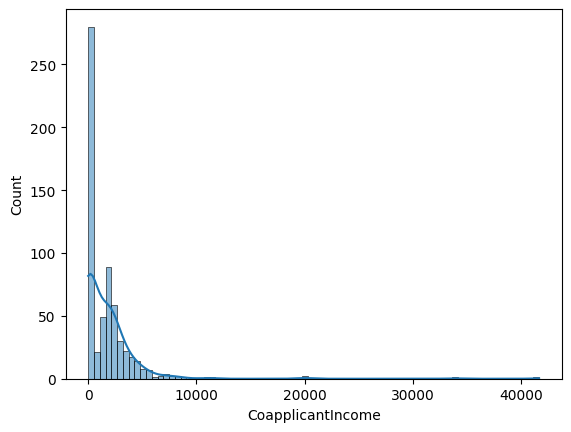

In [5]:
sns.histplot(df["CoapplicantIncome"],kde=True)

plt.show()

In [6]:
 q1 = df["CoapplicantIncome"].quantile(0.25)
 q3 = df["CoapplicantIncome"].quantile(0.75)

iqr = q3-q1


In [7]:
min_range = q1-(1.5*iqr)
max_range = q1+(1.5*iqr)

In [8]:
min_range,max_range

(-3445.875, 3445.875)

In [9]:
df =  df[df["CoapplicantIncome"]<=max_range]

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

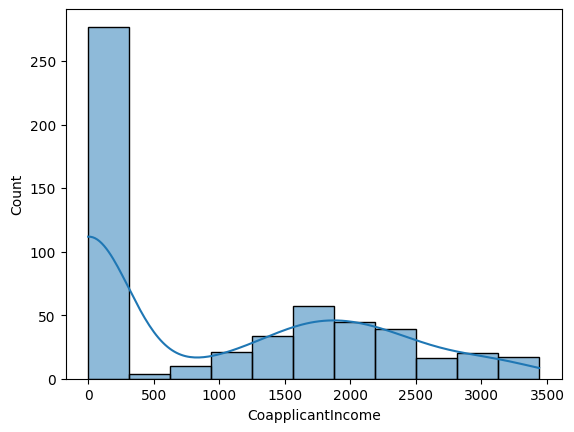

In [10]:
sns.histplot(df["CoapplicantIncome"],kde=True)

In [11]:
from sklearn.preprocessing import FunctionTransformer

In [12]:
ft = FunctionTransformer(func=np.log1p)

In [13]:
ft.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [14]:
df["Coapplication_tf"] = ft.transform(df[["CoapplicantIncome"]])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10832\130657045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Coapplication_tf"] = ft.transform(df[["CoapplicantIncome"]])


In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplication_tf
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000


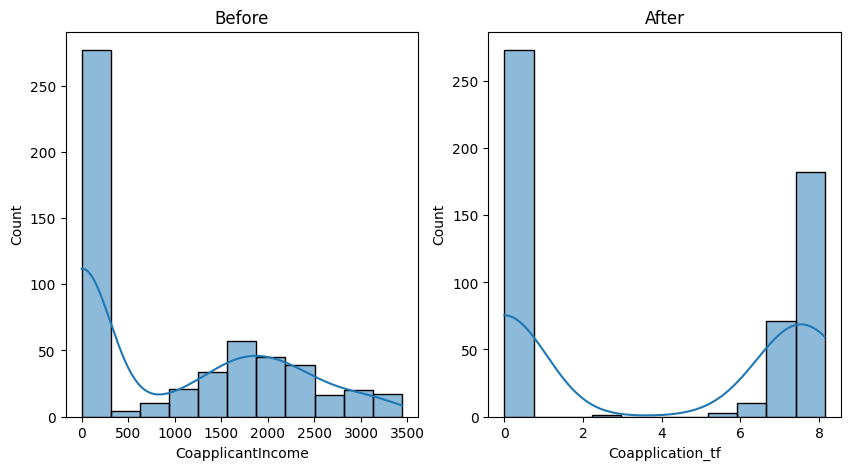

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(df["CoapplicantIncome"],kde=True)

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(df["Coapplication_tf"],kde=True)

plt.show()


In [17]:
ft = FunctionTransformer(func=lambda x: x**2)
ft.fit(df[["CoapplicantIncome"]])
df["Coapplication_tf"] = ft.transform(df[["CoapplicantIncome"]])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10832\83065260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Coapplication_tf"] = ft.transform(df[["CoapplicantIncome"]])


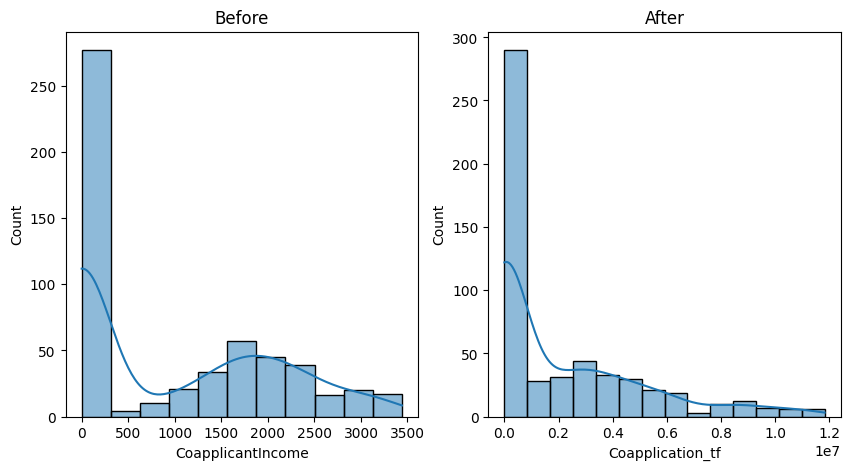

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(df["CoapplicantIncome"],kde=True)

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(df["Coapplication_tf"],kde=True)

plt.show()
